Worked on by: Iljas

Clean the data

This is very important on both datasets as you don't control the field-names yourself.

    Rename columns to remove spaces from the name and make them all lowercase.
    Look for the Na-values. Fix them if possible, using a couple of techniques before deciding which is best.
    Look for the Outliers. Fix them if needed, using a couple of techniques before deciding which is best.
    Look for (ordered) categoricals and label them as such.

Exploratory data analysis

    Show the outliers and try to explain them.
    Draw some graphs about features you find interesting.
    Look for correlations in your data.

Repeat

Both phases (cleaning and exploring) aren't two different steps in a process, but rather one large fuzzy mess of code. Something like:

    I'll give all the Na's the mean value.
    My graphs look strange, what is this peak doing at the mean?
    Is there a correlation between the value that has a lot of Na's and another column?
    Let's use the other column to fill in the Na's!

In the upcoming steps of this project you'll put all the really good code together to make one final import, but for now poke the data and see what happens.
Final loading and preparing

Once you've cleaning and exploring and cleaning and exploring you'll lose track of the necessary steps and the optional steps. It's also possible that you did some cleaning that wasn't needed (e.g predict a field that should have been left empty).

So end up your cleaning by creating a notebook that contains all the code to go from rough data to prepared data without any of the graphs.

This has to be done for all both datasets.

# Clean

### Import

In [27]:
%pip install pandas
%pip install scikit-learn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import csv
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

### Clean columns

In [37]:
input_file = "subset_price_paid_records.csv"

df = pd.read_csv(
    input_file,
    parse_dates = ["Date of Transfer"]
)

df.columns = (
    df.columns
    .str.lower()
    .str.replace(" -", "")
    .str.replace("/", "_or_")
    .str.replace(" ", "_")
)

df

,transaction_unique_identifier,price,date_of_transfer,property_type,old_or_new,duration,town_or_city,district,county,ppdcategory_type,record_status_monthly_file_only
0,{81B82214-7FBC-4129-9F6B-4956B4A663AD},25000,1995-08-18,T,N,F,OLDHAM,OLDHAM,GREATER MANCHESTER,A,A
1,{8046EC72-1466-42D6-A753-4956BF7CD8A2},42500,1995-08-09,S,N,F,GRAYS,THURROCK,THURROCK,A,A
2,{278D581A-5BF3-4FCE-AF62-4956D87691E6},45000,1995-06-30,T,N,F,HIGHBRIDGE,SEDGEMOOR,SOMERSET,A,A
3,{1D861C06-A416-4865-973C-4956DB12CD12},43150,1995-11-24,T,N,F,BEDFORD,NORTH BEDFORDSHIRE,BEDFORDSHIRE,A,A
4,{DD8645FD-A815-43A6-A7BA-4956E58F1874},18899,1995-06-23,S,N,F,WAKEFIELD,LEEDS,WEST YORKSHIRE,A,A
...,...,...,...,...,...,...,...,...,...,...,...
749639,{DC158053-F78C-4956-A3A1-14493C722D92},56000,1995-05-26,S,N,F,GREAT YARMOUTH,GREAT YARMOUTH,NORFOLK,A,A
749640,{4A2AD09F-A107-4E18-8FC8-14495B2A480F},187000,1995-06-09,D,N,F,CLITHEROE,RIBBLE VALLEY,LANCASHIRE,A,A
749641,{C6AF402C-713F-4C3C-8C4E-05F7FB4A0D30},15000,1995-03-16,T,N,F,KEIGHLEY,BRADFORD,WEST YORKSHIRE,A,A
749642,{5FAC3D40-69C7-4246-ABE5-05F80614171E},60000,1995-09-29,S,N,F,BECCLES,WAVENEY,SUFFOLK,A,A


# Exploration

In [38]:
print(f"amount na values:\n{df.isna().sum()}")

amount na values:
transaction_unique_identifier      0
price                              0
date_of_transfer                   0
property_type                      0
old_or_new                         0
duration                           0
town_or_city                       0
district                           0
county                             0
ppdcategory_type                   0
record_status_monthly_file_only    0
dtype: int64


In [39]:
print(f"Unique values per column:\n{df.nunique()}")
print()
print(f"All unique values of some columns:")
print(f"property_type: {df['property_type'].unique()}")
print(f"old_or_new: {df['old_or_new'].unique()}")
print(f"duration: {df['duration'].unique()}")
print(f"ppdcategory_type: {df['ppdcategory_type'].unique()}")
print(f"record_status_monthly_file_only: {df['record_status_monthly_file_only'].unique()}")

Unique values per column:
transaction_unique_identifier      749644
price                               13980
date_of_transfer                      365
property_type                           5
old_or_new                              2
duration                                3
town_or_city                         1157
district                              452
county                                127
ppdcategory_type                        2
record_status_monthly_file_only         1
dtype: int64

All unique values of some columns:
property_type: ['T' 'S' 'D' 'F' 'O']
old_or_new: ['N' 'Y']
duration: ['F' 'L' 'U']
ppdcategory_type: ['A' 'B']
record_status_monthly_file_only: ['A']


# Remove unneeded columns

transaction_unique_identifier - primary key, not needed</br>
record_status_monthly_file_only - only has 1 unique value in data

In [40]:
df = df.drop(columns=["transaction_unique_identifier", "record_status_monthly_file_only"])

# Exploration

ValueError: 'HIST_BINS' is not a valid estimator for `bins`

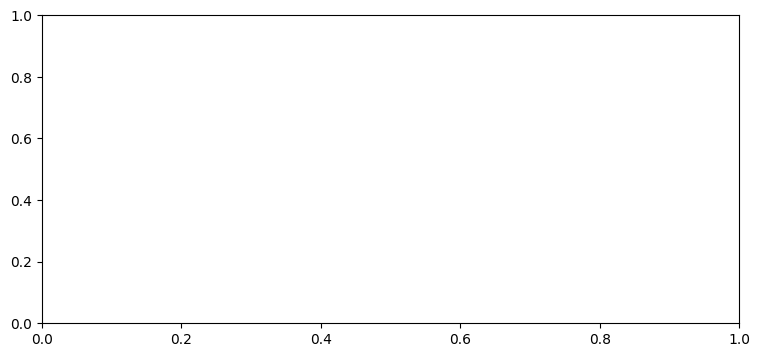

In [ ]:
numerical_columns = ["price",""]
label_columns = ["property_type", "old_or_new", "duration", "town_or_city", "district", "county", "ppdcategory_type"]
date_columns = ["date_of_transfer"]

TOP_N = 30
HIST_BINS = "auto"

def plot_numeric(col):
    s = pd.to_numeric(df[col], errors="coerce").dropna()

    # Histogram (distribution)
    plt.figure(figsize=(9, 4))
    plt.hist(s.values, bins=HIST_BINS)
    plt.title(f"{col} — distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(True, axis="y", alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_categorical(col):
    s = df[col].astype("string")
    vc = s.value_counts(dropna=False).head(TOP_N)

    labels = [str(x) for x in vc.index]
    y = np.arange(len(vc))

    plt.figure(figsize=(9, max(3, 0.35 * len(vc))))
    plt.barh(y, vc.values)
    plt.yticks(y, labels)
    plt.gca().invert_yaxis()  # show most frequent at top
    plt.title(f"{col} — top {len(vc)} categories")
    plt.xlabel("Count")
    plt.grid(True, axis="x", alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_date(col):
    s = pd.to_datetime(df[col], errors="coerce").dropna()
    if s.empty:
        return

    # Counts per month
    per_month = s.dt.to_period("M").value_counts().sort_index()
    x = per_month.index.to_timestamp()
    y = per_month.values

    plt.figure(figsize=(9, 4))
    plt.plot(x, y)
    plt.title(f"{col} — count per month")
    plt.xlabel("Month")
    plt.ylabel("Rows")
    plt.grid(True, axis="y", alpha=0.3)
    plt.tight_layout()
    plt.show()

for column in df.columns:
    if column in numerical_columns:
        plot_numeric(column)
    elif column in label_columns:
        plot_categorical(column)
    elif column in date_columns:
        plot_date(column)

# Encode labels

In [34]:
# Your original small categorical one-hot encoding
df = pd.get_dummies(df, columns=['property_type', 'old_or_new', 'duration', 'ppdcategory_type'])

# Large categorical columns that will use embeddings
embed_cols = ['town_or_city', 'district', 'county']

# Create a dict to store the label encoders and embedding sizes
encoders = {}
embedding_sizes = {}

for col in embed_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col].astype(str))
    encoders[col] = encoder
    num_unique = df[col].nunique()
    embedding_dim = min(50, (num_unique + 1) // 2)  # rule of thumb: smallish embedding
    embedding_sizes[col] = (num_unique, embedding_dim)

print("Embedding sizes:", embedding_sizes)

df

Embedding sizes: {'town_or_city': (1157, 50), 'district': (452, 50), 'county': (127, 50)}


,price,date_of_transfer,town_or_city,district,county,property_type_D,property_type_F,property_type_O,property_type_S,property_type_T,old_or_new_N,old_or_new_Y,duration_F,duration_L,duration_U,ppdcategory_type_A,ppdcategory_type_B
0,25000,1995-08-18,738,278,47,False,False,False,False,True,True,False,True,False,False,True,False
1,42500,1995-08-09,418,395,109,False,False,False,True,False,True,False,True,False,False,True,False
2,45000,1995-06-30,475,326,94,False,False,False,False,True,True,False,True,False,False,True,False
3,43150,1995-11-24,83,254,3,False,False,False,False,True,True,False,True,False,False,True,False
4,18899,1995-06-23,1051,211,119,False,False,False,True,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749639,56000,1995-05-26,420,163,75,False,False,False,True,False,True,False,True,False,False,True,False
749640,187000,1995-06-09,262,305,61,True,False,False,False,False,True,False,True,False,False,True,False
749641,15000,1995-03-16,520,38,119,False,False,False,False,True,True,False,True,False,False,True,False
749642,60000,1995-09-29,79,417,103,False,False,False,True,False,True,False,True,False,False,True,False


# Exploration

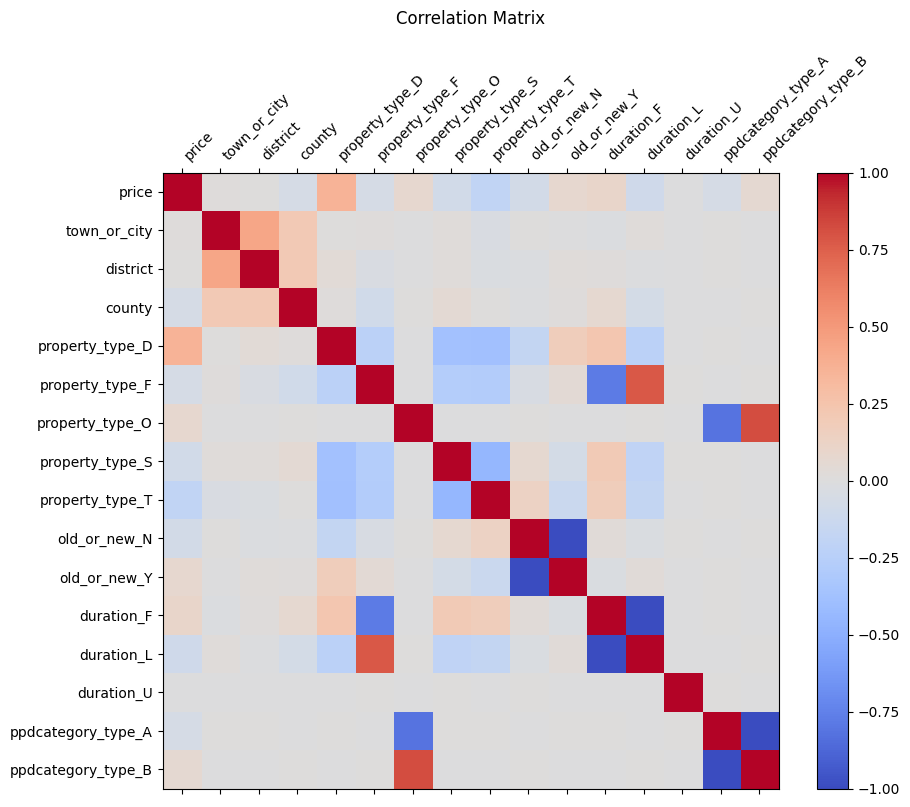

In [35]:
corr = df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr, cmap="coolwarm")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="left")
plt.yticks(range(len(corr.columns)), corr.columns)
fig.colorbar(cax)
plt.title("Correlation Matrix", pad=20)
plt.show()